In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
import numpy as np
import pandas as pd
from astropy.table import Table  # just to read fits

In [3]:
os.chdir('/home/walml/repos/zoobot')

In [40]:
ml_loc = 'results/temp/decals_n2_allq_m0_all_mean.csv'  # load the predictions (only one model here)
ml_raw = pd.read_csv(ml_loc)
print('Galaxies with ML predictions: ' + str(len(ml)))
ml_raw['bar_any_fraction'] = ml_raw['bar_strong_fraction'] + ml_raw['bar_weak_fraction']

Galaxies with ML predictions: 309398


In [5]:
nsa = Table.read('/media/walml/beta/galaxy_zoo/decals/catalogs/nsa_v1_0_0_decals_dr5.fits')

In [12]:
nsa_all = Table.read('/media/walml/beta/galaxy_zoo/decals/catalogs/raw/nsa_v1_0_0.fits')

In [66]:
nsa_all

IAUNAME,SUBDIR,RA,DEC,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,NSAID,ZDIST,NMGY [7],NMGY_IVAR [7],OK,RNMGY [7],ABSMAG [7],AMIVAR [7],EXTINCTION [7],KCORRECT [7],KCOEFF [5],MTOL [7],B300,B1000,METS,MASS,XCEN,YCEN,NPROF [7],PROFMEAN [105],PROFMEAN_IVAR [105],QSTOKES [105],USTOKES [105],BASTOKES [105],PHISTOKES [105],PETROFLUX [7],PETROFLUX_IVAR [7],FIBERFLUX [7],FIBERFLUX_IVAR [7],BA50,PHI50,BA90,PHI90,SERSICFLUX [7],SERSICFLUX_IVAR [7],SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY [7],CLUMPY [7],DFLAGS [7],AID,PID,DVERSION,PROFTHETA [15],PETROTHETA,PETROTH50,PETROTH90,SERSIC_TH50,PLATE,FIBERID,MJD,RACAT,DECCAT,ZSDSSLINE,SURVEY,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC,abs_mag_r
bytes19,bytes27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,bytes7,float32,int16,int16,int16,bytes3,float32,float32,int32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,bytes8,float32,float32,float32,float32,float32,int32,int16,int32,float64,float64,float32,bytes6,bytes27,bytes8,int32,float64,float64,float32
J094651.40-010228.5,09h/m00/J094651.40-010228.5,146.714215072841,-1.0412800233313741,0,72212,37354,-1,-1,-1,15.178774,0.021222278,sdss,0.07,756,1,206,301,136.2967,1095.152,0,0.020687785,29.696056 .. 3267.6895,0.29814342 .. 0.00012172792,1,31.368013 .. 3501.2527,-15.17281 .. -20.302134,223.03555 .. 1102.6129,0.4536473 .. 0.080934174,-0.005893635 .. 0.019576037,0.00017777947 .. 5.1533486e-11,0.00020792194 .. 0.98780394,2.7473723e-05,0.31195974,0.035135116,8898397000.0,215.39407348632812,213.4535369873047,10 .. 12,0.3149959 .. 0.0,233.37904 .. 0.0,0.062215745 .. -0.07950058,0.0006146176 .. -0.1274703,0.8828513 .. 0.7387829,0.2829979 .. -60.97547,18.203371 .. 2264.6604,1.9946122 .. 0.015697604,1.0260131 .. 561.97687,47.3397 .. 0.33574256,0.88909996,14.777527,0.80408496,17.367554,19.554192 .. 3146.785,1.0691423 .. 0.017162137,4.7761517,0.6651653,15.97821,-0.0109440535 .. 0.004525926,0.042470127 .. 0.042621203,0 .. 0,0,36,v2_1_13,0.22341923 .. 258.39,7.2478933,3.4641922,10.453795,5.882104,266,1,51630,146.71420341874853,-1.0412749124036818,0.0,sdss,legacy,good,122,146.71421,-1.0413043,-19.66463
J094630.85-004554.5,09h/m00/J094630.85-004554.5,146.6285851269414,-0.7651620976591762,1,-1,-1,-1,-1,-1,17.318521,0.06465632,sdss,0.06491773,1239,2,175,301,735.56384,1277.3636,1,0.06403577,2.4606192 .. 443.66675,5.447516 .. 0.006137319,1,2.6590455 .. 454.05856,-14.978118 .. -20.688284,27.979414 .. 1024.811,0.60185605 .. 0.10737576,-0.018567445 .. 0.051569887,1.7666649e-05 .. 6.712402e-13,0.00035330586 .. 1.0529422,1.4492807e-05,0.21530226,0.031020422,12929411000.0,145.3625946044922,121.33534240722656,10 .. 11,0.044930786 .. 0.0,1644.0168 .. 0.0,0.15447958 .. 0.1804297,0.0016548077 .. 0.05960713,0.73236895 .. 0.680643,0.30686864 .. 9.140798,1.5539132 .. 380.1313,11.729078 .. 0.018252498,0.10988019 .. 131.71373,345.7848 .. 0.57769156,0.7371746,87.53705,0.50988674,87.96927,1.4135201 .. 416.9717,17.281208 .. 0.089459315,2.222374,0.27854216,86.21106,-0.0066564083 .. 0.0052427053,0.04789895 .. 0.075857244,0 .. 0,0,29,v2_1_13,0.22341923 .. 258.39,5.6178217,2.3269887,6.7219906,3.291051,266,4,51630,146.62857001083813,-0.7651439853236099,0.0,sdss,legacy,good,122,146.62857,-0.76513683,-20.027859
J094631.59-005917.7,09h/m00/J094631.59-005917.7,146.63170644325592,-0.9883467023052999,2,72132,-1,-1,-1,-1,18.123354,0.05265425,sdss,0.07,756,1,206,301,618.0556,344.6873,2,0.052030597,5.9062114 .. 117.6328,2.735704 .. 0.048443027,1,5.766684 .. 117.70143,-15.453841 .. -18.720377,80.95401 .. 568.64264,0.43238893 .. 0.07714152,-0.024124824 .. -0.005638472,2.5192165e-07 .. 4.9804896e-07,3.070332e-05 .. 0.8028418,0.024668738,0.0852406,0.021334123,15

In [67]:
nsa_all[['IAUNAME', 'ABSMAG', 'NMGY']]

IAUNAME,ABSMAG [7],NMGY [7]
bytes19,float32,float32
J094651.40-010228.5,-15.17281 .. -20.302134,29.696056 .. 3267.6895
J094630.85-004554.5,-14.978118 .. -20.688284,2.4606192 .. 443.66675
J094631.59-005917.7,-15.453841 .. -18.720377,5.9062114 .. 117.6328
J094744.18-004013.4,-14.764457 .. -22.449923,0.59546506 .. 578.8718
J094751.74-003242.0,-13.724207 .. -19.51415,0.7154174 .. 211.616
J094751.24-004533.5,-13.49373 .. -20.730406,0.15854369 .. 200.11954
J094726.35-004832.0,-12.236421 .. -22.022743,0.053592928 .. 322.6117
J094622.25-004536.9,-16.330616 .. -20.501509,8.491365 .. 381.71893
J094654.77-003324.5,-13.249523 .. -20.355661,0.24637717 .. 168.2418


In [17]:
nsa_all['ABSMAG'][0][0]

-15.17281

In [78]:
def maggie_to_mag(maggie):
# http://www.sdss3.org/dr8/algorithms/magnitudes.php     
    return 22.5 - 2.5 * np.log10(maggie + 1e-8)

In [79]:
nsa_all['abs_mag_r'] = [x[4] for x in nsa_all['ABSMAG']]
nsa_all['app_mag_r'] = [maggie_to_mag(x[4]) for x in nsa_all['NMGY']]

/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
nsa_mags = nsa_all[['IAUNAME', 'abs_mag_r', 'app_mag_r']].to_pandas()
nsa_mags = nsa_mags.rename(columns={'IAUNAME': 'iauname'})
nsa_mags['iauname'] = nsa_mags['iauname'].apply(lambda x: x.decode('utf8'))
nsa_mags

,iauname,abs_mag_r,app_mag_r
0,J094651.40-010228.5,-19.664631,14.368318
1,J094630.85-004554.5,-20.027859,16.596434
2,J094631.59-005917.7,-18.398241,17.712449
3,J094744.18-004013.4,-21.748932,16.390821
4,J094751.74-003242.0,-19.075111,17.192232
...,...,...,...
641404,J235101.08-100042.7,-19.988722,16.987621
641405,J235247.10-105259.6,-21.195393,15.887695
641406,J235320.91-103238.7,-18.182632,18.928566
641407,J235406.94-102419.7,-22.499992,14.480161


In [90]:
# usually I just pull out the useful columns and merge straight away, but this can cause endian problems
nsa_iaunames = list(nsa['iauname'])
nsa_redshifts = list(nsa['z'])
# nsa_df = nsa[['iauname', 'z']].to_pandas()

nsa_redshifts = pd.DataFrame(data={'iauname': nsa_iaunames, 'redshift': nsa_redshifts})
nsa_df = pd.merge(nsa_mags, nsa_redshifts, how='inner', on='iauname')
len(nsa_df)

343128

In [91]:
nsa_df

,iauname,abs_mag_r,app_mag_r,redshift
0,J094651.40-010228.5,-19.664631,14.368318,0.021222
1,J094630.85-004554.5,-20.027859,16.596434,0.064656
2,J094631.59-005917.7,-18.398241,17.712449,0.052654
3,J094744.18-004013.4,-21.748932,16.390821,0.121270
4,J094751.74-003242.0,-19.075111,17.192232,0.055981
...,...,...,...,...
343123,J230924.60-001458.1,-19.384344,18.623463,0.116300
343124,J235101.08-100042.7,-19.988722,16.987621,0.074300
343125,J235247.10-105259.6,-21.195393,15.887695,0.076100
343126,J235320.91-103238.7,-18.182632,18.928566,0.077100


In [92]:
ml = pd.merge(ml_raw, nsa_df, on='iauname', how='inner')
len(ml)

309398

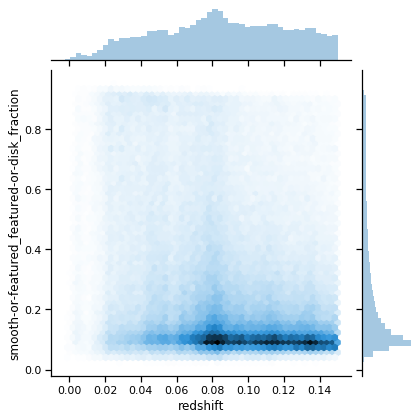

In [93]:
sns.jointplot(data=ml, x='redshift', y='smooth-or-featured_featured-or-disk_fraction', kind='hex')

In [94]:
ml = ml.replace([np.inf, -np.inf], np.nan)
pd.isna(ml['abs_mag_r']).value_counts()

False    309392
True          6
Name: abs_mag_r, dtype: int64

In [95]:
ml = ml.dropna(subset=['abs_mag_r'])

In [ ]:
# slice at -22->-21.75 (bright), -21->-20.75 (peak), -19.75->-19.5 (faint) 

Text(0, 0.5, 'Galaxies')

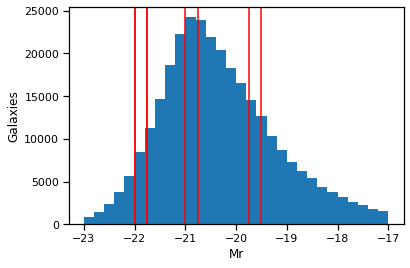

In [322]:
plt.hist(ml['abs_mag_r'], range=[-23, -17], bins=30)
plt.axvline(-22, color='r')
plt.axvline(-21.75, color='r')
plt.axvline(-22, color='r')
plt.axvline(-21.75, color='r')
plt.axvline(-21, color='r')
plt.axvline(-20.75, color='r')
plt.axvline(-19.75, color='r')
plt.axvline(-19.5, color='r')
plt.xlabel('Mr')
plt.ylabel('Galaxies')

(array([5.1000e+01, 6.8000e+01, 9.2000e+01, 1.4800e+02, 1.6700e+02,
        2.7000e+02, 3.4000e+02, 4.6900e+02, 6.0400e+02, 8.8700e+02,
        1.5100e+03, 2.0610e+03, 3.1300e+03, 4.4800e+03, 6.4700e+03,
        9.3750e+03, 1.3233e+04, 1.9035e+04, 2.6361e+04, 3.4109e+04,
        4.2844e+04, 5.2023e+04, 5.3242e+04, 1.6408e+04, 7.6270e+03,
        6.2720e+03, 4.1420e+03, 2.0340e+03, 9.1700e+02, 4.2300e+02]),
 array([10.        , 10.33333333, 10.66666667, 11.        , 11.33333333,
        11.66666667, 12.        , 12.33333333, 12.66666667, 13.        ,
        13.33333333, 13.66666667, 14.        , 14.33333333, 14.66666667,
        15.        , 15.33333333, 15.66666667, 16.        , 16.33333333,
        16.66666667, 17.        , 17.33333333, 17.66666667, 18.        ,
        18.33333333, 18.66666667, 19.        , 19.33333333, 19.66666667,
        20.        ]),
 <a list of 30 Patch objects>)

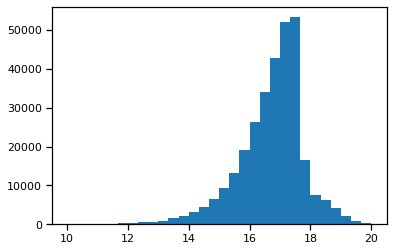

In [102]:
plt.hist(ml['app_mag_r'], range=[10, 20],  bins=30)

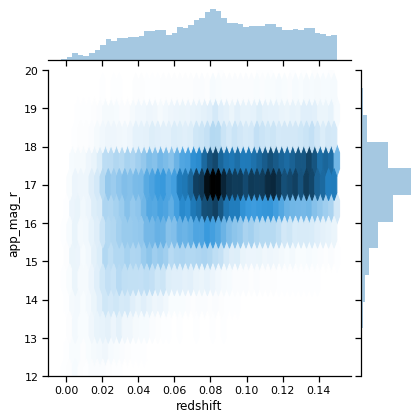

In [104]:
sns.jointplot(data=ml, x='redshift', y='app_mag_r', kind='hex', ylim=[12, 20])


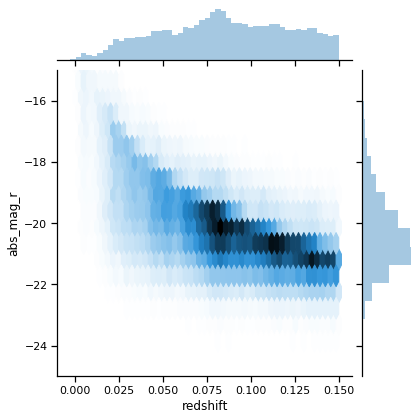

In [64]:
sns.jointplot(data=ml, x='redshift', y='abs_mag_r', kind='hex', ylim=[-25, -15])


In [ ]:
# slice at -22->-21.75 (bright), -21->-20.75 (peak), -19.75->-19.5 (faint) 

In [282]:
# brightest = ml.query('abs_mag_r < -21.75').query('abs_mag_r > -22.')
# middle = ml.query('abs_mag_r < -21').query('abs_mag_r > -21.25')
# faintest = ml.query('abs_mag_r < -19.5').query('abs_mag_r > -19.75')

brightest = ml.query('abs_mag_r < -21.75').query('abs_mag_r > -22.')
middle = ml.query('abs_mag_r < -20.75').query('abs_mag_r > -21')
faintest = ml.query('abs_mag_r < -19.5').query('abs_mag_r > -19.75')
bright_range = '-22.00 < Mr < -21.75'
middle_range = '-21.00 < Mr < -20.75'
faint_range = '-19.75 < Mr < -19.50'

len(brightest), len(middle), len(faintest)

(10929, 30356, 17357)

In [283]:
def add_bins(df, col, bins=15):  # inplace
    df[col + '_interval'] = pd.cut(df[col], bins=15)
    df[col + '_bin_center'] = df[col + '_interval'].apply(lambda x: x.right + (x.right - x.left)/2)

In [284]:
add_bins(brightest, 'redshift')
add_bins(middle, 'redshift')
add_bins(faintest, 'redshift')

In [285]:
# sns.lineplot(data=brightest, x='redshift_bin_center', y='abs_mag_r')

(0.02, 0.15)

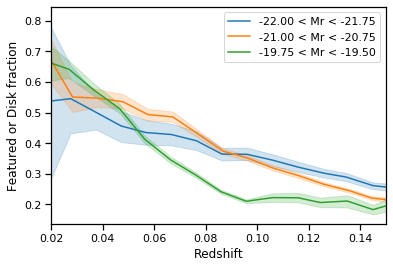

In [312]:
sns.lineplot(data=brightest, x='redshift_bin_center', y='smooth-or-featured_featured-or-disk_fraction', label=bright_range)
sns.lineplot(data=middle, x='redshift_bin_center', y='smooth-or-featured_featured-or-disk_fraction', label=middle_range)
sns.lineplot(data=faintest, x='redshift_bin_center', y='smooth-or-featured_featured-or-disk_fraction', label=faint_range)
plt.ylabel('Featured or Disk fraction')
plt.xlabel('Redshift')
plt.xlim(0.02, 0.15)

In [266]:
def select_featured(df):
    featured = df['smooth-or-featured_featured-or-disk_fraction'] > 0.43
    not_edge_on = df['disk-edge-on_no_fraction'] > 0.715  # could relax to .6
    df = df[featured & not_edge_on]
    return df

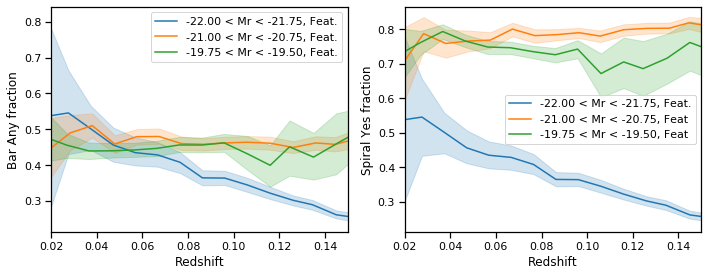

In [313]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4), sharey=False, sharex=True)

y_col = 'bar_any_fraction'
sns.lineplot(data=brightest, x='redshift_bin_center', y='smooth-or-featured_featured-or-disk_fraction', label=bright_range + ', Feat.', ax=ax0)
sns.lineplot(data=select_featured(middle), x='redshift_bin_center', y=y_col, label=middle_range + ', Feat.', ax=ax0)
sns.lineplot(data=select_featured(faintest), x='redshift_bin_center', y=y_col, label=faint_range + ', Feat.', ax=ax0)
ax0.set_ylabel('Bar Any fraction')
ax0.set_xlabel('Redshift')
ax0.set_xlim(0.02, 0.15)

y_col = 'has-spiral-arms_yes_fraction'
sns.lineplot(data=brightest, x='redshift_bin_center', y='smooth-or-featured_featured-or-disk_fraction', label=bright_range + ', Feat.', ax=ax1)
sns.lineplot(data=select_featured(middle), x='redshift_bin_center', y=y_col, label=middle_range + ', Feat', ax=ax1)
sns.lineplot(data=select_featured(faintest), x='redshift_bin_center', y=y_col, label=faint_range + ', Feat', ax=ax1)
ax1.set_ylabel('Spiral Yes fraction')
ax1.set_xlabel('Redshift')
ax1.set_xlim(0.02, 0.15)

fig.tight_layout()

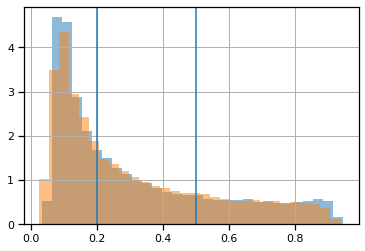

In [269]:
middle['smooth-or-featured_featured-or-disk_fraction'].hist(bins=30, density=True, alpha=.5)
faintest['smooth-or-featured_featured-or-disk_fraction'].hist(bins=30, density=True, alpha=.5)
plt.axvline(0.2)
plt.axvline(0.5)

In [290]:
def set_q1_class(featured_frac):
    if featured_frac < 0.2:
        return 'smooth'
    elif featured_frac > 0.5:
        return 'featured'
    else:
        return 'unknown'

In [291]:
brightest['q1_class'] = brightest['smooth-or-featured_featured-or-disk_fraction'].apply(set_q1_class)
middle['q1_class'] = middle['smooth-or-featured_featured-or-disk_fraction'].apply(set_q1_class)
faintest['q1_class'] = faintest['smooth-or-featured_featured-or-disk_fraction'].apply(set_q1_class)

In [292]:
brightest_smooth_frac = brightest.groupby('redshift_bin_center').agg({'q1_class': lambda x: np.mean(x == 'smooth')}).reset_index()
brightest_featured_frac = brightest.groupby('redshift_bin_center').agg({'q1_class': lambda x: np.mean(x == 'featured')}).reset_index()
brightest_unknown_frac = brightest.groupby('redshift_bin_center').agg({'q1_class': lambda x: np.mean(x == 'unknown')}).reset_index()

In [293]:
middle_smooth_frac = middle.groupby('redshift_bin_center').agg({'q1_class': lambda x: np.mean(x == 'smooth')}).reset_index()
middle_featured_frac = middle.groupby('redshift_bin_center').agg({'q1_class': lambda x: np.mean(x == 'featured')}).reset_index()
middle_unknown_frac = middle.groupby('redshift_bin_center').agg({'q1_class': lambda x: np.mean(x == 'unknown')}).reset_index()

In [294]:
faintest_smooth_frac= faintest.groupby('redshift_bin_center').agg({'q1_class': lambda x: np.mean(x == 'smooth')}).reset_index()
faintest_featured_frac = faintest.groupby('redshift_bin_center').agg({'q1_class': lambda x: np.mean(x == 'featured')}).reset_index()
faintest_unknown_frac = faintest.groupby('redshift_bin_center').agg({'q1_class': lambda x: np.mean(x == 'unknown')}).reset_index()

In [295]:
np.array(middle_featured_frac['redshift_bin_center'])

array([0.018755, 0.02835 , 0.03805 , 0.0479  , 0.05755 , 0.06725 ,
       0.0771  , 0.08675 , 0.09645 , 0.1057  , 0.116   , 0.126   ,
       0.136   , 0.1445  , 0.155   ])

In [314]:
x_min, x_max = np.min(brightest['redshift_bin_center']), np.max(brightest['redshift_bin_center'])

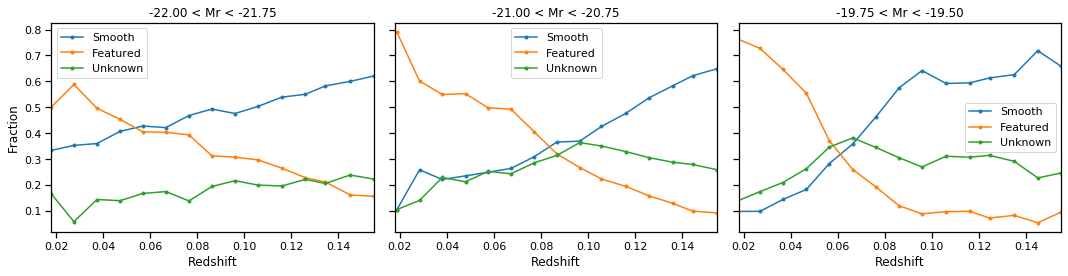

In [317]:


fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 4), sharex=True, sharey=True)

ax0.plot(np.array(brightest_smooth_frac['redshift_bin_center']), brightest_smooth_frac['q1_class'], label='Smooth', marker='.')
ax0.plot(np.array(brightest_featured_frac['redshift_bin_center']), brightest_featured_frac['q1_class'], label='Featured', marker='.')
ax0.plot(np.array(brightest_unknown_frac['redshift_bin_center']), brightest_unknown_frac['q1_class'], label='Unknown', marker='.')
ax0.set_title(bright_range)
ax0.set_xlabel('Redshift')
ax0.set_ylabel('Fraction')
ax0.set_xlim([x_min, x_max])
ax0.legend()

ax1.plot(np.array(middle_smooth_frac['redshift_bin_center']), middle_smooth_frac['q1_class'], label='Smooth', marker='.')
ax1.plot(np.array(middle_featured_frac['redshift_bin_center']), middle_featured_frac['q1_class'], label='Featured', marker='.')
ax1.plot(np.array(middle_unknown_frac['redshift_bin_center']), middle_unknown_frac['q1_class'], label='Unknown', marker='.')
ax1.set_title(middle_range)
ax1.set_xlabel('Redshift')
# ax1.set_ylabel('Fraction')
ax1.set_xlim([x_min, x_max])
ax1.legend()

ax2.plot(np.array(faintest_smooth_frac['redshift_bin_center']), faintest_smooth_frac['q1_class'], label='Smooth', marker='.')
ax2.plot(np.array(faintest_featured_frac['redshift_bin_center']), faintest_featured_frac['q1_class'], label='Featured', marker='.')
ax2.plot(np.array(faintest_unknown_frac['redshift_bin_center']), faintest_unknown_frac['q1_class'], label='Unknown', marker='.')
ax2.set_title(faint_range)
ax2.set_xlabel('Redshift')
ax2.set_xlim([x_min, x_max])
# ax0.set_ylabel('Fraction')
ax2.legend()
fig.tight_layout()